# Question #2

### We first import the needed libraires

In [1]:
import pandas as pd
from math import log
import seaborn as sns
import matplotlib.pyplot as plt
import operator
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

### Reading the data and gathering some basic info about it

In [2]:
data = pd.read_csv("cardio_train.csv", sep= ';')

In [3]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1230BF40>,
      dtype=object)

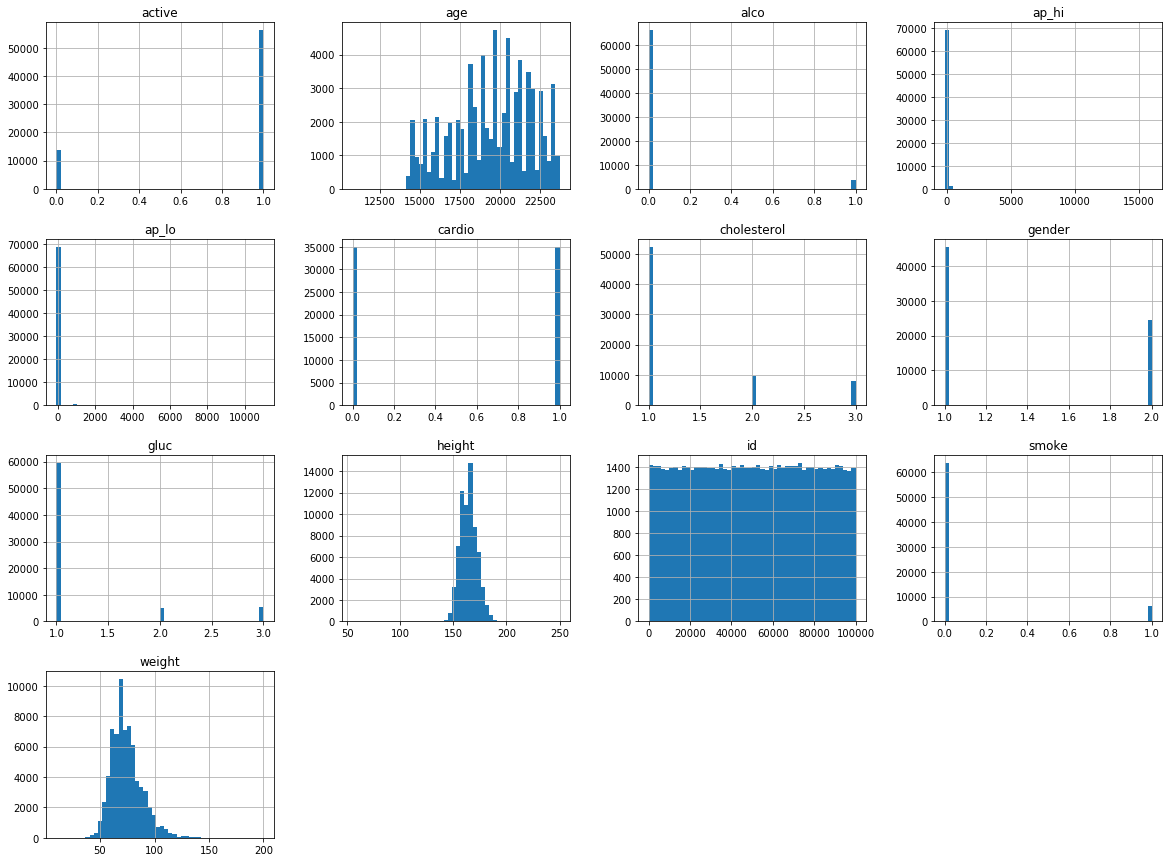

In [4]:
data.hist(bins=50, figsize=(20,15))

### From the above histograms regarding the features we find that we see that we have 5 discrete featrues, So we need to look them up to see if we can cluster them into classes

## Bivariate Analysis:

### Age

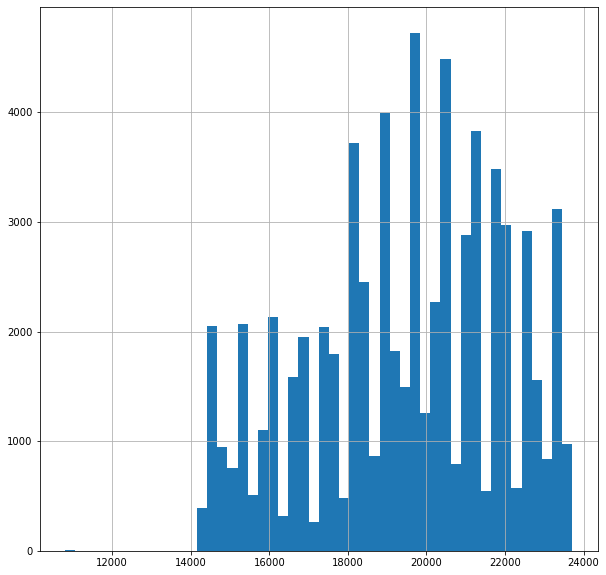

In [5]:
data.age.hist(bins=50, figsize=(10,10))

### We will transform the age from days to years to make it easy for the clustering

In [6]:
data.age = (data['age'] / 365).round().astype('int')

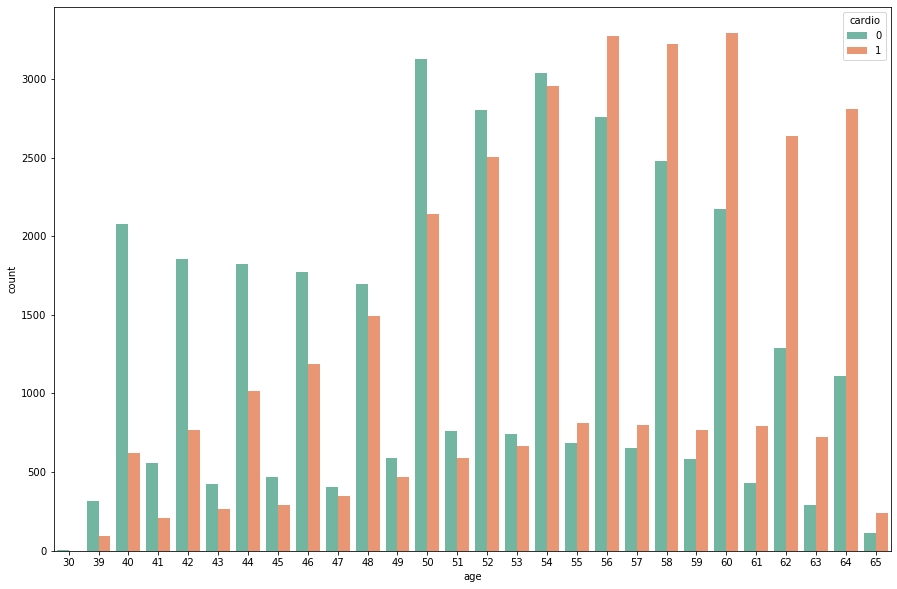

In [7]:
fig, axs = plt.subplots(figsize=(15,10))
sns.countplot(x='age', hue='cardio', data = data, palette="Set2")

### We can split the data into two main class below and above 50 years

In [8]:
class1_index = data[ data['age'] <= 50 ].index
class2_index = data[ data['age'] > 50 ].index
data['age'][class1_index] = 0
data['age'][class2_index] = 1

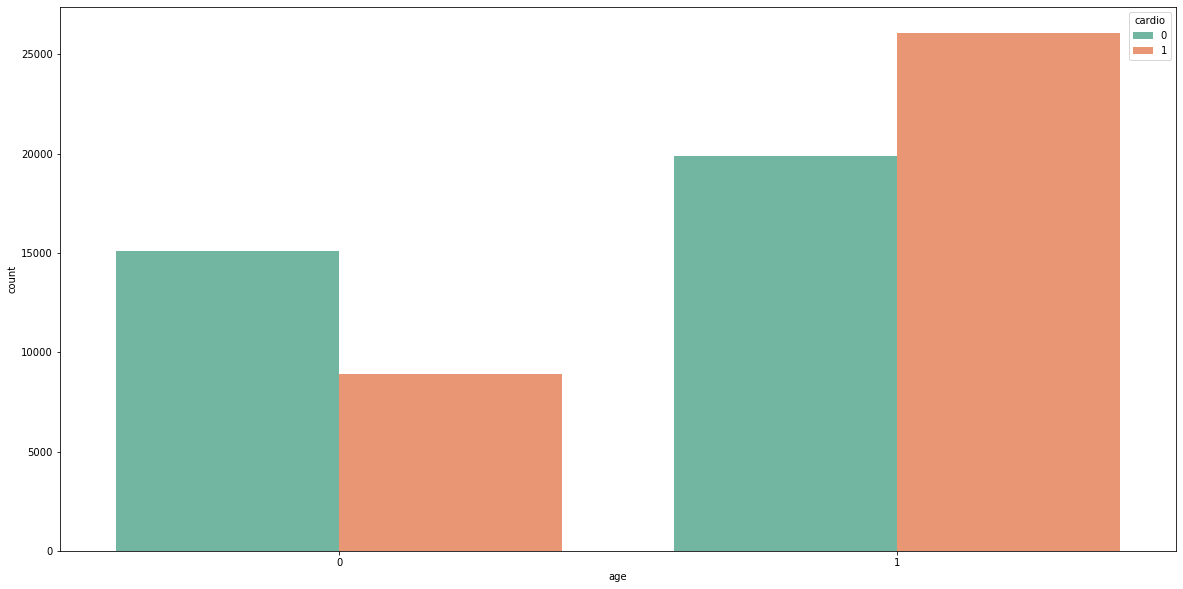

In [9]:
fig, axs = plt.subplots(figsize=(20,10))
sns.countplot(x='age', hue='cardio', data = data, palette="Set2")

## AP_HI

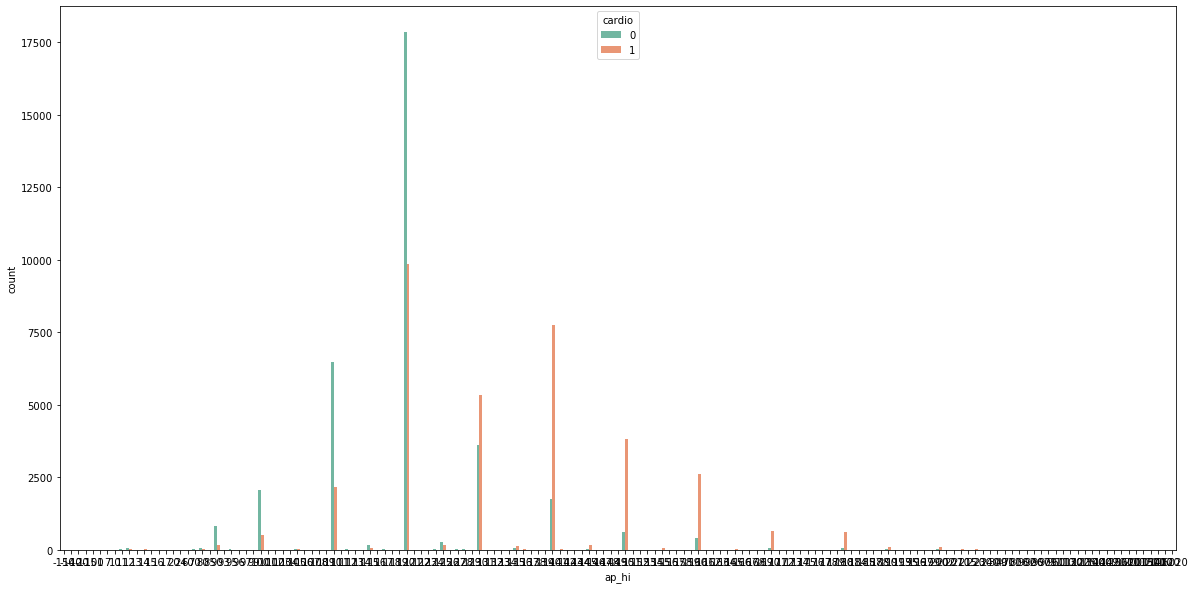

In [10]:
fig, axs = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='ap_hi', hue='cardio', data = data, palette="Set2")

### The range of systolic blood pressure is (70-190), So we remove other data

In [11]:
index_lower = data[ data['ap_hi'] < 70 ].index
index_higher = data[ data['ap_hi'] > 190 ].index
print(len(index_higher))
print(len(index_lower))
data.drop(index_lower , inplace=True)
data.drop(index_higher , inplace=True)

220
189


### from the above fraph we get that the ap_hi can be classified into two classes below 120 and above 120

In [12]:
class1_index = data[ data['ap_hi'] <= 120 ].index
class2_index = data[ data['ap_hi'] > 120 ].index
data['ap_hi'][class1_index] = 0
data['ap_hi'][class2_index] = 1

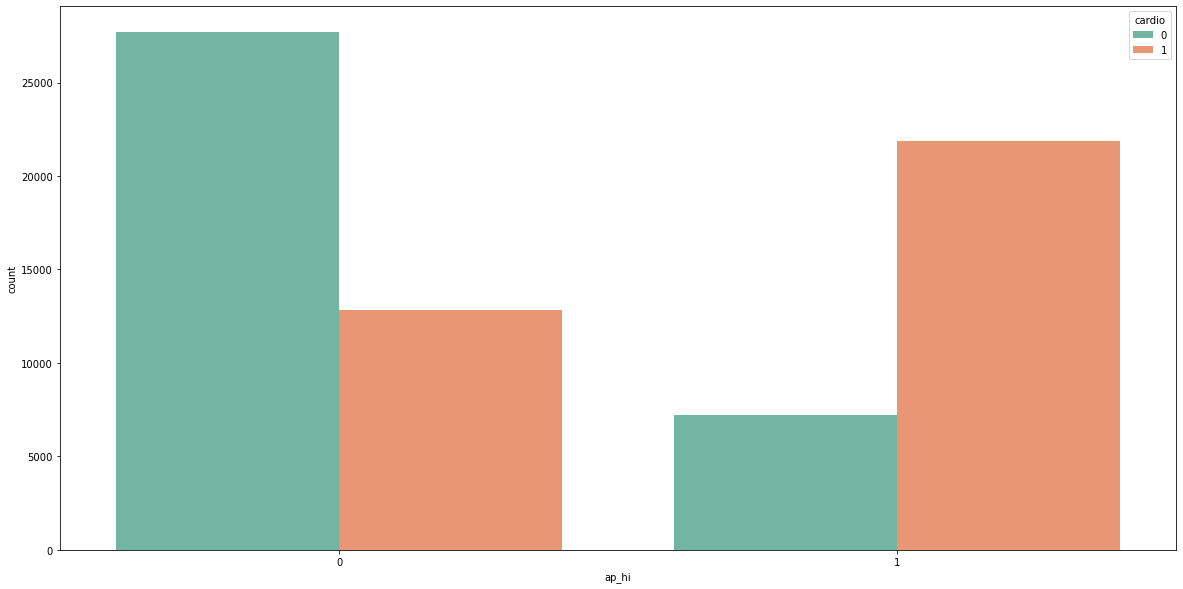

In [13]:
fig, axs = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='ap_hi', hue='cardio', data = data, palette="Set2")

## ap_lo

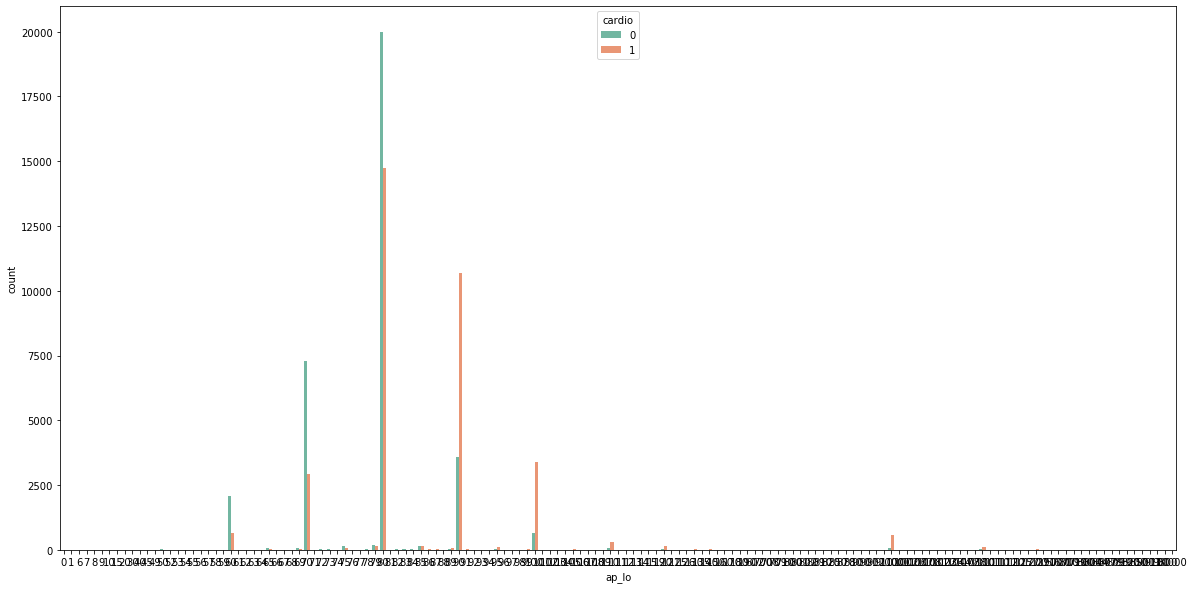

In [14]:
fig, axs = plt.subplots(figsize=(20,10))
sns.countplot(x='ap_lo', hue='cardio', data = data, palette="Set2")

### from the above fraph we get that the ap_lo can be classified into two classes below 80 and above 80

In [15]:
class1_index = data[ data['ap_lo'] <= 80 ].index
class2_index = data[ data['ap_lo'] > 80 ].index
data['ap_lo'][class1_index] = 0
data['ap_lo'][class2_index] = 1

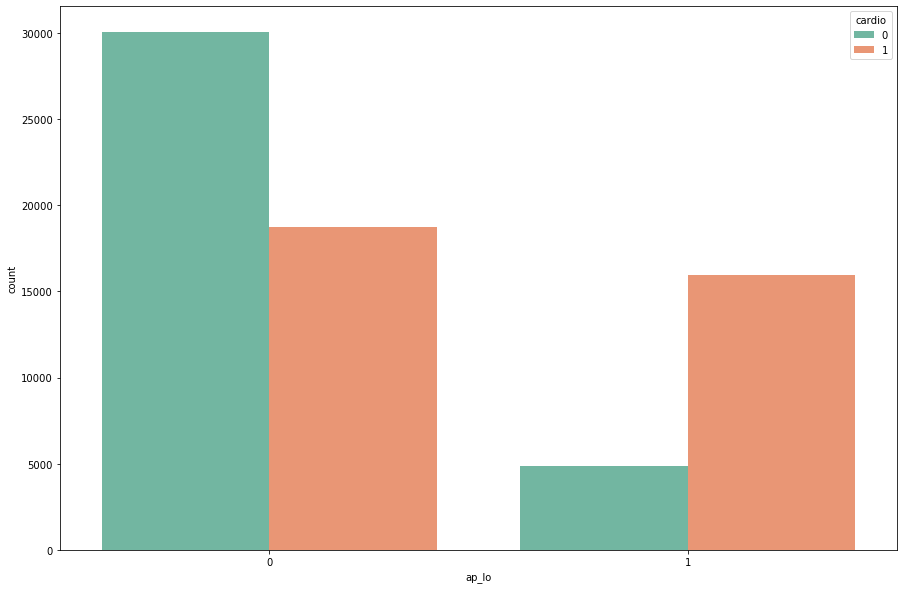

In [16]:
fig, axs = plt.subplots(figsize=(15,10))
ax = sns.countplot(x='ap_lo', hue='cardio', data = data, palette="Set2")

## Weight

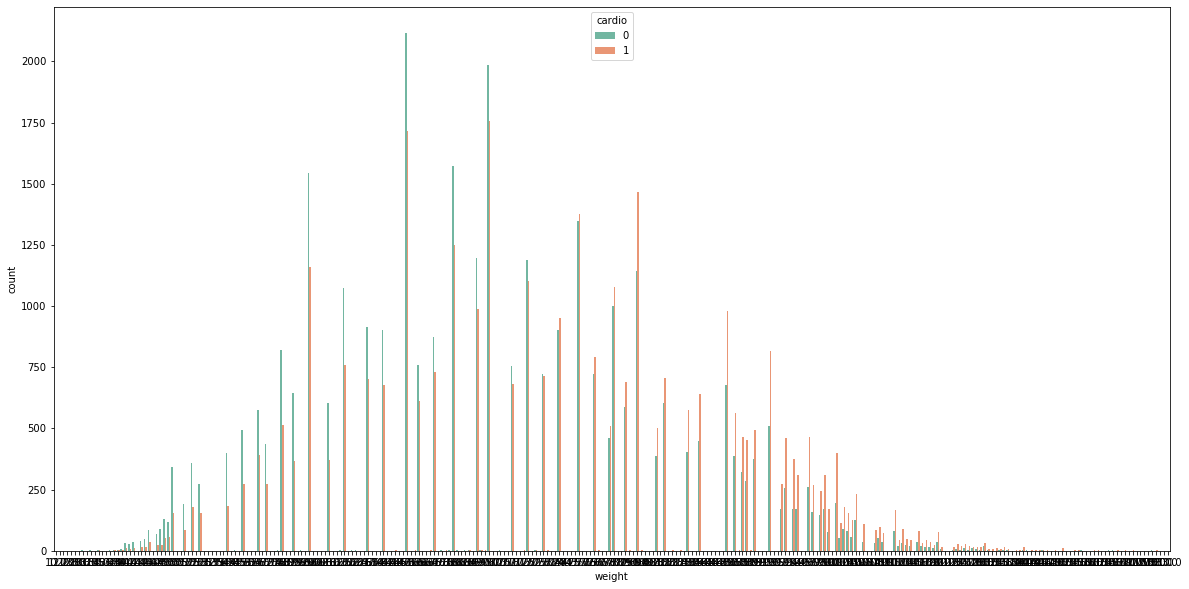

In [17]:
fig, axs = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='weight', hue='cardio', data = data, palette="Set2")

### We can separate the feature into two class, belw 70 and above 70

In [18]:
class1_index = data[ data['weight'] <= 70 ].index
class2_index = data[ data['weight'] > 70 ].index
data['weight'][class1_index] = 0
data['weight'][class2_index] = 1

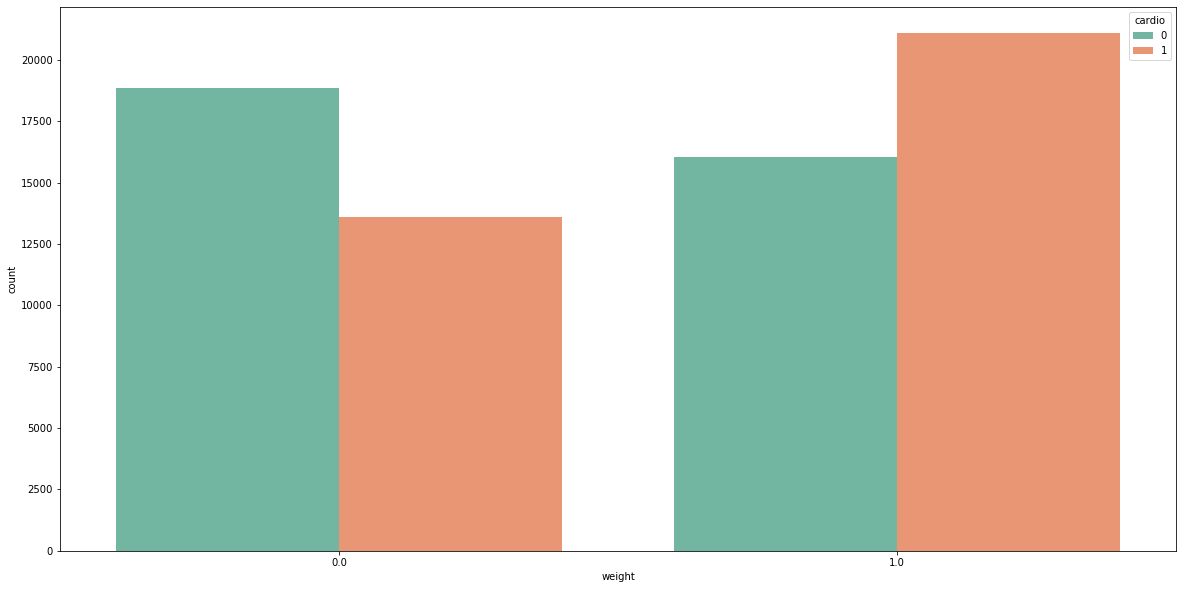

In [19]:
fig, axs = plt.subplots(figsize=(20,10))
sns.countplot(x='weight', hue='cardio', data = data, palette="Set2")

### From the above result we're gonna exclude the "weight" feature since we can't split them into two categories
### And we'll do the same with the "height" feature

### Changing the classes to 0,1,2

### Cholesterol

In [20]:
class1_index = data[ data['cholesterol'] == 1 ].index
class2_index = data[ data['cholesterol'] == 2 ].index
class3_index = data[ data['cholesterol'] == 3 ].index
data['cholesterol'][class1_index] = 0
data['cholesterol'][class2_index] = 1
data['cholesterol'][class3_index] = 2

### Gender

In [21]:
class1_index = data[ data['gender'] == 1 ].index
class2_index = data[ data['gender'] == 2 ].index
data['gender'][class1_index] = 0
data['gender'][class2_index] = 1

### Gluc

In [22]:
class1_index = data[ data['gluc'] == 1 ].index
class2_index = data[ data['gluc'] == 2 ].index
class3_index = data[ data['gluc'] == 3 ].index
data['gluc'][class1_index] = 0
data['gluc'][class2_index] = 1
data['gluc'][class3_index] = 2

## Plotting the finalized data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13352988>,
      dtype=object)

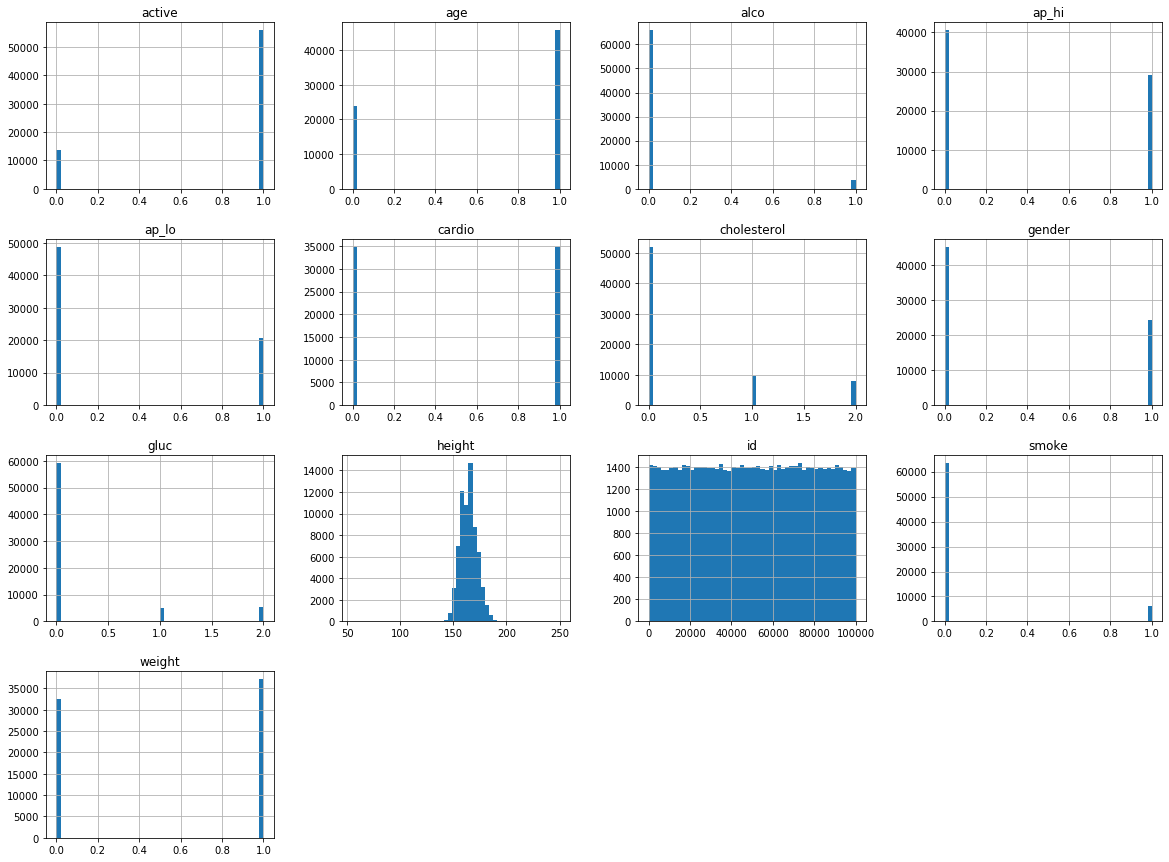

In [23]:
data.hist(bins=50, figsize=(20,15))

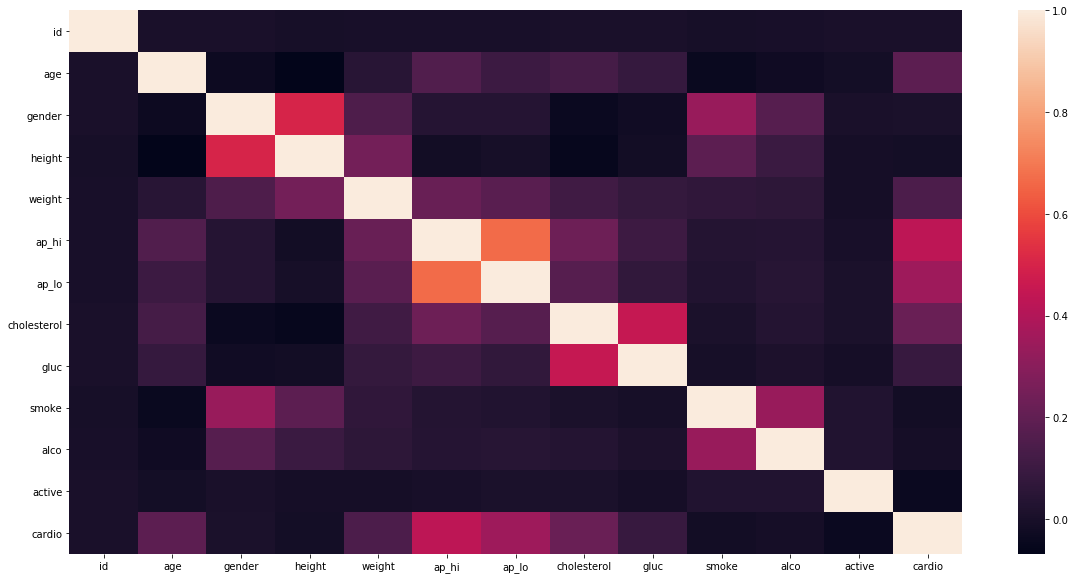

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), ax= ax)

# Getting ready with the data

## Removing the feature that's not supportive to the learning phase

In [25]:
data1 = data.drop(columns=['height','weight','id'])
data1.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,1,0,0,0,0,0,0,1,0
1,1,0,1,1,2,0,0,0,1,1
2,1,0,1,0,2,0,0,0,0,1
3,0,1,1,1,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0


## Splitting the data

In [26]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_index in split.split(data1, data1["cardio"]):
    strat_train_set = data1.iloc[train_index]
    strat_test_set = data1.iloc[test_index]

### Function that calculates the entropy

In [27]:
def get_entropy(values):
    #print(values)
    if values[3] != 0:
        first_entropy = -(values[3]/values[0])*log(values[3]/values[0], 2)
    else:
        first_entropy = 0
    if values[4] != 0:
        first_entropy += -(values[4]/values[0])*log(values[4]/values[0], 2)
    else:
        first_entropy += 0
    if values[5] != 0:
        second_entropy = -(values[5]/values[1])*log(values[5]/values[1], 2)
    else:
        second_entropy = 0
    if values[6] != 0:
        second_entropy += -(values[6]/values[1])*log(values[6]/values[1], 2)
    else:
        second_entropy+= 0
    if values[7] != 0:
        third_entropy = -(values[7]/values[2])*log(values[7]/values[2], 2)
    else:
        third_entropy = 0
    if values[8] != 0:
        third_entropy += -(values[8]/values[2])*log(values[8]/values[2], 2)
    else:
        third_entropy += 0
    return first_entropy, second_entropy, third_entropy

### Getting the entropy of the output

In [28]:
def get_main_class_entropy(df):
    class_count = dict()
    class_prob = []
    class_entropy = 0.0
    for i in range(len(df.unique())):
        class_count[df.unique()[i]] = len(df[df == df.unique()[i]])
        class_prob.append(class_count[df.unique()[i]]/len(df))
    for i in range(len(class_prob)):
        if len(df.unique()) > 2 :
            class_entropy += -(class_prob[i])*log(class_prob[i],len(class_prob))
    return class_entropy, class_count, class_prob

### Getting the best feature by calculating the information gain of each feature in each tree node

In [29]:
def get_best_feature(data):
    if len(data) == 0:
        return "tree", "ended"
    cardio_entropy, cardio_count, cardio_prob = get_main_class_entropy(data.cardio)
    features = dict()

# first major class count, second major class count, first first minor class count, first second minor class count,
# second first minor class count, second second minor class count
    for i in range(data.shape[1]-1):
        first_class = data[data[data.iloc[:,i].name] == 0]
        first_class_first_class = first_class[first_class[first_class.iloc[:,-1].name] == 0]
        first_class_secound_class = first_class[first_class[first_class.iloc[:,-1].name] == 1]
        second_class = data[data[data.iloc[:,i].name] == 1]
        second_class_first_class = second_class[second_class[second_class.iloc[:,-1].name] == 0]
        second_class_second_class = second_class[second_class[second_class.iloc[:,-1].name] == 1]
        third_class = data[data[data.iloc[:,i].name] == 2]
        third_class_first_class = third_class[third_class[third_class.iloc[:,-1].name] == 0]
        third_class_secound_class = third_class[third_class[third_class.iloc[:,-1].name] == 1]
        features[data.iloc[:,i].name] = [len(first_class), len(second_class), len(third_class), len(first_class_first_class), 
            len(first_class_secound_class), len(second_class_first_class), len(second_class_second_class), len(third_class_first_class),
            len(third_class_secound_class)]
        #if len(data.iloc[:,0].unique()) == 2:
            #features[data.iloc[:,i].name] = [len(first_class), len(second_class), len(first_class_first_class), len(first_class_secound_class)            ,len(second_class_first_class), len(second_class_second_class)]
    entropy = dict()
    for i in range(len(features)):
        first_ent, second_ent, third_ent = get_entropy(features[list(features.keys())[i]])
        entropy[list(features.keys())[i]] = [first_ent, second_ent, third_ent]
    gain = dict()
    for i in range(len(entropy)):
        feature_gain = cardio_entropy - (features[list(features.keys())[i]][0]/len(data))*entropy[list(entropy.keys())[i]][0] - (features[list(features.keys())[i]][1]/len(data))*entropy[list(entropy.keys())[i]][1] - (features[list(features.keys())[i]][2]/len(data))*entropy[list(entropy.keys())[i]][2]
        gain[list(features.keys())[i]] = feature_gain
    print("Gain =" , gain[max(gain.keys(), key=(lambda k: gain[k]))])
    return max(gain.keys(), key=(lambda k: gain[k])), features[max(gain.keys(), key=(lambda k: gain[k]))]

### Building the tree by making it loop recursively until the assigned depth is reached, Below it's hard coded to be at depth of 5 but it can be redesigned to accept different depths.
## The function takes the arguments of:
* The data which is the initial training data
* The depth (it's hard coded to be 5)
* The direction of the expansion and it's initialized to be the root
* The tree which is a list of list to append the levels and nodes of the tree
## The function returns the tree

In [30]:
def build_tree(data, depth, direction, tree):
        if depth == 0 or len(data) == 0:
            return False
        depth1 = depth
        depth2 = depth
        depth3 = depth
        flag = False
        flag1 = False
        flag2 = False
        print("..............................")
        print(direction)
        feature, feature_info = get_best_feature(data)
        print(feature, ': has',feature_info[0], 'in class 0' )
        print(feature, ': has',feature_info[1], 'in class 1' )
        print(feature, ': has',feature_info[2], 'in class 2' )
        print('class 0 has ', feature_info[3], 'of 0 classifications')
        print('class 0 has ', feature_info[4], 'of 1 classifications')
        print('class 1 has ', feature_info[5], 'of 0 classification')
        print('class 1 has ', feature_info[6], 'of 1 classification')
        print('class 2 has ', feature_info[7], 'of 0 classification')
        print('class 2 has ', feature_info[8], 'of 1 classification')        
        
        
        classification_0 = feature_info[3:5].index(max([feature_info[3], feature_info[4]]))
        classification_1 = feature_info[5:7].index(max([feature_info[5], feature_info[6]]))
        classification_2 = feature_info[7:].index(max([feature_info[7], feature_info[8]]))

        classification_0 += 3
        classification_1 += 5
        classification_2 += 7

        if classification_0 == 3:
            print("When it's 0, class 0")
            flag = True
            i = 0
        if classification_0 == 4:
            print("When it's 0, class 1")
            flag = True
            i = 1
        if classification_1 == 5:
            print("When it's 1, class 0")
            flag1 = True
            k = 0
        if classification_1 == 6:
            print("When it's 1, class 1")
            flag1 = True
            k = 1
        if classification_2 == 7:
            print("When it's 2, class 0")
            flag2 = True
            j = 0
        if classification_2 == 8:
            print("When it's 2, class 1")
            flag2 = True
            j = 1
        
        tree1 = [feature]
        df1 = data[data[feature] == 0].drop(columns=[feature])
        depth1 -=1
        tree2 = build_tree(df1, depth1, direction+"right,", tree1)
        if tree2:
            tree.append(tree2)

        df2 = data[data[feature] == 1].drop(columns=[feature])
        depth2 -=1
        tree3 = build_tree(df2, depth2, direction+"left,", tree1)
        
        df3 = data[data[feature] == 2].drop(columns=[feature])
        depth3 -=1
        tree4 = build_tree(df3, depth3, direction+"middle,", tree1)
        
        tree.append([feature,classification_0, classification_1, classification_2])
        print(tree)
        return tree

In [31]:
def ID3_tree(data, depth):
    tree = build_tree(data, depth, "root,", [])
    return tree

In [32]:
tree = ID3_tree(strat_train_set, 5)

..............................
root,
Gain = -0.8429257509448076
ap_hi : has 5252 in class 0
ap_hi : has 3536 in class 1
ap_hi : has 0 in class 2
class 0 has  3712 of 0 classifications
class 0 has  1540 of 1 classifications
class 1 has  856 of 0 classification
class 1 has  2680 of 1 classification
class 2 has  0 of 0 classification
class 2 has  0 of 1 classification
When it's 0, class 0
When it's 1, class 1
When it's 2, class 0
..............................
root,right,
Gain = -0.8443171524872062
age : has 2169 in class 0
age : has 3083 in class 1
age : has 0 in class 2
class 0 has  1763 of 0 classifications
class 0 has  406 of 1 classifications
class 1 has  1949 of 0 classification
class 1 has  1134 of 1 classification
class 2 has  0 of 0 classification
class 2 has  0 of 1 classification
When it's 0, class 0
When it's 1, class 0
When it's 2, class 0
..............................
root,right,right,
Gain = -0.6721804008619219
cholesterol : has 1888 in class 0
cholesterol : has 209 in cla

In [33]:
tree

[['ap_hi',
  ['age',
   ['cholesterol',
    ['alco', ['gender', 3, 5, 7], ['active', 3, 5, 7]],
    ['alco', 3, 5, 7],
    ['gluc', ['gender', 3, 5, 7], ['smoke', 3, 5, 7], ['active', 3, 6, 7]],
    ['gluc', 3, 5, 8],
    ['gluc', ['smoke', 4, 6, 7], ['gender', 4, 5, 7], ['active', 3, 5, 7]],
    ['gluc', 4, 6, 7]],
   ['cholesterol', 3, 5, 8],
   ['cholesterol',
    ['active', ['smoke', 3, 5, 7], ['gluc', 3, 5, 7]],
    ['active', 3, 5, 7],
    ['gender', ['alco', 3, 5, 7], ['ap_lo', 3, 5, 7]],
    ['gender', 3, 5, 7],
    ['gluc', ['ap_lo', 4, 6, 7], ['active', 4, 6, 7], ['smoke', 4, 6, 7]],
    ['gluc', 4, 6, 8]],
   ['cholesterol', 3, 5, 8]],
  ['age', 3, 5, 7],
  ['ap_lo',
   ['cholesterol',
    ['active', ['age', 3, 6, 7], ['gluc', 4, 6, 8]],
    ['active', 4, 6, 7],
    ['smoke', ['alco', 4, 5, 7], ['age', 3, 5, 7]],
    ['smoke', 4, 5, 7],
    ['active', ['gender', 4, 6, 7], ['gluc', 4, 6, 8]],
    ['active', 4, 6, 7]],
   ['cholesterol', 4, 6, 8],
   ['cholesterol',
    ['gluc

# Testing the model by looping over the testing data within the tree that's been made previously and assigning the final value to the carido1 variable

In [34]:
cardio1 = []
for i in range(len(strat_test_set)):
    root1 = strat_test_set.iloc[i][tree[0][0]]
    root1 = int(2*root1+1)
    branch1 = strat_test_set.iloc[i][tree[0][root1][0]]
    branch1 = int(2*branch1+1)
    branch2 = strat_test_set.iloc[i][tree[0][root1][branch1][0]]
    branch2 = int(2*branch2+1)
    branch3 = strat_test_set.iloc[i][tree[0][root1][branch1][branch2][0]]
    branch3 = int(branch3+1)
    branch4 = strat_test_set.iloc[i][tree[0][root1][branch1][branch2][branch3][0]]
    if tree[0][root1][branch1][branch2][branch3][1] == 3 and branch4 == 0:
        #print("When it's 0, class 0")
        cardio1.append(0)
    elif tree[0][root1][branch1][branch2][branch3][1] == 4 and branch4 == 0:
        #print("When it's 0, class 1")
        cardio1.append(1)
    elif tree[0][root1][branch1][branch2][branch3][2] == 5 and branch4 == 1:
        #print("When it's 1, class 0")
        cardio1.append(0)
    elif tree[0][root1][branch1][branch2][branch3][2] == 6 and branch4 == 1:
        #print("When it's 1, class 1")
        cardio1.append(1)
    elif tree[0][root1][branch1][branch2][branch3][3] == 7 and branch4 == 2:
        #print("When it's 2, class 0")
        cardio1.append(0)
    elif tree[0][root1][branch1][branch2][branch3][3] == 8 and branch4 == 2:
        #print("When it's 2, class 1")
        cardio1.append(1)
    else:
        cardio1.append(int(round(np.mean(cardio1))))

# Testing the mode accuracy

In [35]:
accuracy_score(strat_test_set['cardio'], cardio1)

0.7251436781609195

In [36]:
confusion_matrix(strat_test_set['cardio'], cardio1)

array([[2724,  756],
       [1157, 2323]], dtype=int64)